For now on, I'll need a faster way to manage the database. This test will check accesibility for datasets with HDF5


In [2]:
!pip install simpleITK

     |████████████████████████████████| 47.4MB 86kB/s 


In [30]:
# Git Configuration
!git config --global user.email 'obandomarcos96@gmail.com'
!git config --global user.password 'Quovadis96'

In [31]:
!git add Utilities/DataLoading.py Tests/MoDL_training_test.ipynb Tests/HDF5_dataset_test.ipynb; git commit -m '#9 option 1, saving datasets with built-in Pandas method'

[main 415f299] #9 option 1, saving datasets with built-in Pandas method
 3 files changed, 45 insertions(+), 8 deletions(-)
 create mode 100644 Tests/HDF5_dataset_test.ipynb
 rewrite Tests/MoDL_training_test.ipynb (97%)


In [96]:
import os
os.chdir('/content/drive/MyDrive/Balseiro/Maestría/Implementación/DeepOPT')
# import some libraries
import os,time, sys
sys.path.append('Utilities/')

import numpy as np
import random
import h5py as h5
%load_ext autoreload
%autoreload 1
import matplotlib.pyplot as plt
import pandas as pd
%aimport DataLoading
DL = DataLoading

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
f140114_5dpf = "/content/drive/MyDrive/Balseiro/Maestría/Implementación/Datos/140114_5dpf"  # 5 days post-fertilization
f140117_3dpf = "/content/drive/MyDrive/Balseiro/Maestría/Implementación/Datos/140117_3dpf"  # 3 days post-fertilization
f140115_1dpf = "/content/drive/MyDrive/Balseiro/Maestría/Implementación/Datos/140315_1dpf"  # 1 days post-fertilization

f140315_3dpf = "/content/drive/MyDrive/Balseiro/Maestría/Implementación/Datos/140315_3dpf"     # 3 days post-fertilization
f140415_5dpf_4X = "/content/drive/MyDrive/Balseiro/Maestría/Implementación/Datos/140415_5dpf_4X"  # 5 days post-fertilization
f140419_5dpf = "/content/drive/MyDrive/Balseiro/Maestría/Implementación/Datos/140519_5dpf"     # 5 days post-fertilization

f140714_5dpf = "/content/drive/MyDrive/Balseiro/Maestría/Implementación/Datos/140714_5dpf"
f140827_3dpf_4X = "/content/drive/MyDrive/Balseiro/Maestría/Implementación/Datos/140827_3dpf_4X"
f140827_5dpf_4X = '/content/drive/MyDrive/Balseiro/Maestría/Implementación/Datos/140827_5dpf_4X'

folder_paths = [f140114_5dpf]
results_folder = '/content/drive/MyDrive/Balseiro/Maestría/Implementación/1-DL/Resultados/'

In [87]:
dfs = [DL.ZebraDataset(dataset, 'Datasets', 'Bassi') for dataset in folder_paths]

for df in dfs:
  
  # Cargo el dataset
  df.loadImages(sample = 'head')
  # Cargo las registraciones correspondientes
  df.loadRegTransforms()
  # Aplico las transformaciones para este dataset 
  df.applyRegistration(sample = 'head')

100%|██████████| 180/180 [00:14<00:00, 12.21it/s]


In [88]:
volume = df.getRegisteredVolume('head')

In [93]:
with h5.File('Datasets/OPTdatasets.hdf5', 'r') as f:
  print(f.keys())

<KeysViewHDF5 ['Bassi']>


In [109]:
def getDataset(sample, experimentName, randomChoice = True, datasetFilename = 'Datasets/OPTdatasets.hdf5'):
  '''
  Gets specific(s) dataset(s) from the box.
  Params:
    - experiment_name (str): indicates experiment's maker
    - sample (str) : if needed, selects kind of sample part (for instance, head) 
    - dataset_filename (str) : filename for looking up datasets
  '''

  print('Loading registered dataset\n')

  with h5.File(datasetFilename, 'r') as f:

    if randomChoice == True:

      randomFolder = random.choice(list(f[experimentName].keys()))
      
    volume, angles = f[experimentName][randomFolder][sample][:], f[experimentName][randomFolder][sample+'_angles'][:]

  return volume, angles

In [108]:
vol, angles = getDataset('head', 'Bassi')

Loading registered dataset

['140114_5dpf']


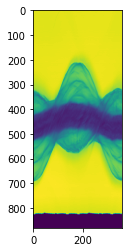

In [112]:
plt.imshow(vol[:,:,0].T)

In [ ]:
!git add Utilities/DataLoading.py Tests/HDF5_dataset_test.ipynb; git commit -m 'HDF5 caveman solution for #9'; git push oriti

In [56]:
with h5.File(df.datasetFolder+'/'+'OPTdatasets.hdf5', 'r') as datasets_file:

  print(datasets_file['Bassi']['140114_5dpf']['head']['block1_values'])

[128   4 149 ... 148  98  46]


In [58]:
with h5.File(df.datasetFolder+'/'+'OPTdatasets.hdf5', 'r') as datasets_file:
  print(datasets_file['Bassi']['140114_5dpf']['head'].keys())

<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values', 'block1_items', 'block1_values']>
